![attachment:logo.png](logo.png)

# BUSINESS UNDERSTANDING

## Overview

StreamFlix aims to implement a movie recommendation system to enhance user experience, increase watch time and improve overall customer retention. The project will utilize the MovieLens dataset to build a collaborative filtering model that provides personalized top 5 movie recommendations for each user based on their previous ratings. StreamFlix has also observed that users often struggle to find movies they enjoy leading to decreased engagement and potential churn.
By implementing a personalized recommendation system, StreamFlix hopes to:

* Increase user satisfaction and engagement
* Boost average watch time per user
* Improve customer retention rates
* Differentiate itself from competitors in the streaming market

The following approaches were proposed to enable new users to provide their ratings:

+ Initial Survey:
When a new user signs up for StreamFlix, they're presented with a quick survey of 20 popular movies across various genres. Users rate at least 10 of these movies on a scale of 1-5 stars.
Continuous Rating:
After watching a movie, users are prompted to rate it. This can be done through:

+ A pop-up immediately after the movie ends
A "Rate this movie" button on the movie's page.
A dedicated "My Ratings" section in the user's profile.


+ Rating Import:
Offer users the option to import their ratings from other platforms (e.g., IMDb, Rotten Tomatoes) to quickly build their profile.
+ Gamification:
Implement a "Movie Critic" badge system where users earn badges for rating a certain number of movies, encouraging more ratings.




## Business Problem



StreamFlix is facing challenges with user retention and engagement. Users are also overwhelmed by the vast library of movies available and often spend a considerable amount of time searching for movies they would enjoy.  StreamFlix is, therefore, looking for a way to provide personalized movie recommendations to its users to improve their viewing experience and increase platform usage. 



## Objectives

### Main Objective

To develop and deploy a collaborative filtering-based recommendation system that accurately predicts user preferences and provides relevant movie suggestions.


### Specific Objectives

1. To build a collaborative filtering model that uses user ratings to generate top 5 movie recommendations.
2. To address the cold start problem using content-based filtering for new users.
3. To evaluate the recommendation system using appropriate metrics like RMSE and MAP.



## Success Metrics

1. Root Mean Square Error (RMSE) < 0.9 for rating predictions
2. Mean Average Precision @5 (MAP@5) > 0.3 for recommended movies
3. User engagement increase: 15% boost in average watch time within 3 months of deployment
4. Hit rate: Percentage of times that a recommended movie was actually watched by the user

## Constraints

1. Data Limitations:
Small dataset size (100,000 ratings), potential bias in the dataset due to demographic skew and time period of ratings and lack of additional movie metadata beyond the information provided in the datasets.

2. Data Sparsity:
Many users may have rated only a small fraction of available movies creating challenges in finding similar users or items with limited data points.

3. Cold Start Problem:
Difficulty providing accurate recommendations for new users or newly added movies, limited effectiveness of collaborative filtering for users with few ratings.

4. A/B Testing Capabilities:
Limitations in conducting extensive A/B tests to compare different recommendation algorithms as well as challenges in measuring long-term effects of recommendations on user behaviour.

5. Ethical Considerations:
Ensuring fairness and avoiding bias in recommendations across different user groups, balancing business objectives with ethical recommendation practices.

6. Genre and Diversity:
Ensuring a balance between accuracy and diversity in recommendations and avoiding over-specialization or "filter bubbles" in user recommendations.

7. Privacy and Data Protection:
Ensuring user data privacy and compliance with regulations like GDPR that establishes the general obligations of data controllers and of those processing personal data on their behalf (processors).

8. Integration Constraints:
Limitations in integrating the recommendation system with existing StreamFlix infrastructure, potential issues with data flow and API compatibility.

9. Evaluation Metrics:
Limitations of evaluation metrics (e.g., RMSE, MAP) in reflecting real-world user satisfaction and a lack of direct user feedback on recommendation quality.

10. Scalability:
Potential performance degradation as the dataset size increases.



















# DATA UNDERSTANDING

This section focuses on getting familiar with our data to gain insights into our features, identify data quality issues and uncover preliminary patterns.

Our model will utilize the Movielens dataset from GroupLens Research Lab covering movie ratings from 1996 to 2018. The dataset contains 100836 ratings and 3683 tag applications across 9742 movies with each user rating at least 20 films. While the full dataset contains 1.9 million ratings, we will focus on a subset of about 100,000 for our current model due to time and resource constraints. This sample size balances computational efficiency with statistical relevance for our recommendation engine development.

We begin by loading the datasets for our movie recommendation system. The datasets include `links.csv`, `movies.csv`, `ratings.csv` and `tags.csv`. These datasets are then merged on the `movieId` column to form a unified DataFrame for further analysis.

In [1]:
# Import relevant libraries

# Data manipulation 
import pandas as pd 
import numpy as np 

# Data visualization
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline

# Data modelling
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler

# Filter future warnings
import warnings
warnings.filterwarnings('ignore')


We create a class to explore the datasets.

In [2]:
class DataExplorer:
    '''
    A class to handle and explore multiple pandas DataFrames.

    Attributes:
        file_paths (dict): A dictionary of file paths for the csv files to load.
        data (dict): A dictionary of the loaded DataFrames.
        merged_data (pandas.DataFrame): The merged DataFrame.

    Methods:
        load_data(): Load the CSV files into DataFrames.
        merge_data(): Merge the DataFrames on movieId.
        get_shape(): Print the number of rows and columns in the DataFrame.
        summarize_info(): Print a summary of the DataFrame columns.
        describe_data(): Print descriptive statistics of the DataFrame.
        display_column_types(): Display numerical and categorical columns.
    '''

    def __init__(self, file_paths):
        '''
        Initialize the DataExplorer object.

        Args:
            file_paths (dict): A dictionary of file paths for the csv files to load.
        '''
        self.file_paths = file_paths
        self.data = {}
        self.merged_data = None

    def load_data(self):
        '''
        Load the csv files into DataFrames.

        Returns:
            None
        '''
        for name, path in self.file_paths.items():
            print(f'Loading {name} data csv file...')
            try:
                self.data[name] = pd.read_csv(path)
                print(f'{name} dataset loaded successfully from {path}\n')
            except FileNotFoundError:
                print(f'Error: The file \'{path}\' was not found.')
            except Exception as e:
                print(f'Error: An unexpected error occurred: {e}')

    def merge_data(self):
        '''
        Merge the DataFrames on movieId.

        Returns:
            None
        '''
        try:
            print('Merging data on movieId...')
            self.merged_data = pd.merge(self.data['movies'], self.data['ratings'], on='movieId', how='left')
            self.merged_data = pd.merge(self.merged_data, self.data['tags'], on='movieId', how='left')
            self.merged_data = pd.merge(self.merged_data, self.data['links'], on='movieId', how='left')
            print('Data merged successfully\n')
        except KeyError as e:
            print(f'Error: A KeyError occurred: {e}. Please ensure all DataFrames contain the column \'movieId\'.')

    def get_shape(self):
        '''
        Print the number of rows and columns in the merged DataFrame.

        Returns:
            None
        '''
        if self.merged_data is not None:
            rows, columns = self.merged_data.shape
            print(f'The merged DataFrame has {rows} rows and {columns} columns.\n')
        else:
            print('Error: No merged data available. Please call the merge_data() method first.')

    def summarize_info(self):
        '''
        Print a summary of the merged DataFrame columns.

        Returns:
            None
        '''
        print('Summarizing the merged DataFrame info')
        print('-------------------------------')
        if self.merged_data is not None:
            print(self.merged_data.info())
        else:
            print('Error: No merged data available. Please call the merge_data() method first.')

    def describe_data(self):
        '''
        Print descriptive statistics of the merged DataFrame.

        Returns:
            None
        '''
        print('\nDescribing the merged DataFrame data')
        print('--------------------------------')
        if self.merged_data is not None:
            display(self.merged_data.describe())
        else:
            print('Error: No merged data available. Please call the merge_data() method first.')

    def display_column_types(self):
        '''
        Display numerical and categorical columns of the merged DataFrame.

        Returns:
            None
        '''
        print('\nDisplaying numerical and categorical columns of the merged DataFrame')
        print('-----------------------------------------------')
        if self.merged_data is not None:
            numerical_columns = self.merged_data.select_dtypes(include='number').columns
            categorical_columns = self.merged_data.select_dtypes(include='object').columns
            print(f'Numerical Columns: {numerical_columns}\n')
            print(f'Categorical Columns: {categorical_columns}\n')
        else:
            print('Error: No merged data available. Please call the merge_data() method first.')



In [3]:
# Instantiate 
file_paths = {
    'links': 'movies_data/links.csv',
    'movies': 'movies_data/movies.csv',
    'ratings': 'movies_data/ratings.csv',
    'tags': 'movies_data/tags.csv'
}
data_explorer = DataExplorer(file_paths)

# Load data
data_explorer.load_data()

# Merge data
data_explorer.merge_data()

# Get dimensions
data_explorer.get_shape()

# Summarize info
data_explorer.summarize_info()

# Describe data
data_explorer.describe_data()

# Display numerical and categorical columns
data_explorer.display_column_types()


Loading links data csv file...
links dataset loaded successfully from movies_data/links.csv

Loading movies data csv file...
movies dataset loaded successfully from movies_data/movies.csv

Loading ratings data csv file...
ratings dataset loaded successfully from movies_data/ratings.csv

Loading tags data csv file...
tags dataset loaded successfully from movies_data/tags.csv

Merging data on movieId...
Data merged successfully

The merged DataFrame has 285783 rows and 11 columns.

Summarizing the merged DataFrame info
-------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 285783 entries, 0 to 285782
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   movieId      285783 non-null  int64  
 1   title        285783 non-null  object 
 2   genres       285783 non-null  object 
 3   userId_x     285762 non-null  float64
 4   rating       285762 non-null  float64
 5   timestamp_x  285762 non-null

,movieId,userId_x,rating,timestamp_x,userId_y,timestamp_y,imdbId,tmdbId
count,285783.000000,285762.000000,285762.000000,2.857620e+05,233234.000000,2.332340e+05,2.857830e+05,285770.000000
mean,14927.663741,313.894279,3.841270,1.214707e+09,470.681354,1.384754e+09,2.956050e+05,12797.315320
std,31402.673519,179.451387,1.020798,2.233730e+08,153.324249,1.534705e+08,5.150156e+05,43479.255523
min,1.000000,1.000000,0.500000,8.281246e+08,2.000000,1.137179e+09,4.170000e+02,2.000000
25%,296.000000,160.000000,3.000000,1.019133e+09,424.000000,1.242494e+09,1.098300e+05,489.000000
50%,1721.000000,314.000000,4.000000,1.211377e+09,477.000000,1.457901e+09,1.125730e+05,680.000000
75%,5673.000000,465.000000,4.500000,1.445346e+09,599.000000,1.498457e+09,2.415270e+05,8963.000000
max,193609.000000,610.000000,5.000000,1.537799e+09,610.000000,1.537099e+09,8.391976e+06,525662.000000



Displaying numerical and categorical columns of the merged DataFrame
-----------------------------------------------
Numerical Columns: Index(['movieId', 'userId_x', 'rating', 'timestamp_x', 'userId_y',
       'timestamp_y', 'imdbId', 'tmdbId'],
      dtype='object')

Categorical Columns: Index(['title', 'genres', 'tag'], dtype='object')



### Loading the Data

Our data is from MovieLens dataset from the GroupLens research lab at the University of Minnesota. 
We begin by loading each dataset into a separate pandas DataFrame and then merging them on the `movieId` column for a more holistic view of the data. 

Below is a description of the datasets:

- **links.csv**: Contains identifiers that link MovieLens IDs with IMDb and TMDb IDs.
- **movies.csv**: Contains movie information including titles and genres.
- **ratings.csv**: Contains user ratings for different movies.
- **tags.csv**: Contains user-generated tags for different movies.

### Merged DataFrame

After loading and merging the datasets, the resulting DataFrame has **285,783 rows and 11 columns**. Here is a brief summary of the columns in the merged DataFrame:

- **movieId**: Unique identifier for each movie.
- **title**: Movie title.
- **genres**: Movie genres.
- **userId_x**: User ID for ratings.
- **rating**: Rating given by the user.
- **timestamp_x**: Timestamp of the rating.
- **userId_y**: User ID for tags.
- **tag**: User-generated tag.
- **timestamp_y**: Timestamp of the tag.
- **imdbId**: IMDb identifier for the movie.
- **tmdbId**: TMDb identifier for the movie.


### Numerical and Categorical Columns

The DataFrame contains the following numerical and categorical columns:

- **Numerical Columns**: `movieId`, `userId_x`, `rating`, `timestamp_x`, `userId_y`, `timestamp_y`, `imdbId`, `tmdbId`.
- **Categorical Columns**: `title`, `genres`, `tag`.

There is a disparity in the total number of values within the different columns that may not necessarily be missing values but that will be addressed in the following section after unnecessary columns are dropped.

# DATA PREPARATION

In this section, we prepare the data for exploratory data analysis (EDA) and modeling. The preprocessing involves several key steps to address and correct errors in the data such as missing values, outliers, duplicates and inconsistencies.


In [4]:
# Display first few rows of the merged data
display(data_explorer.merged_data.head())

,movieId,title,genres,userId_x,rating,timestamp_x,userId_y,tag,timestamp_y,imdbId,tmdbId
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1.0,4.0,964982703.0,336.0,pixar,1.139046e+09,114709,862.0
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1.0,4.0,964982703.0,474.0,pixar,1.137207e+09,114709,862.0
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1.0,4.0,964982703.0,567.0,fun,1.525286e+09,114709,862.0
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5.0,4.0,847434962.0,336.0,pixar,1.139046e+09,114709,862.0
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5.0,4.0,847434962.0,474.0,pixar,1.137207e+09,114709,862.0


### Drop Less Relevant Columns
To streamline the dataset, we are going to drop `timestamp_x`, `timestamp_y`, `tag`, `userId_y`, `imdbId`and `tmdbId` which are the least relevant for our analysis.

* We drop the timestamps because it indicates when a user rated a movie but does not contribute to understanding user preferences or the quality of the recommendations.
* We drop the tags user ID, imdb ID and tmdb ID as they all convey the same information and opt to retain the ratings user ID as our unique identifier.

* We drop the tag column to eliminate redundancy, reduce dataset sparsity and to simplify model complexity allowing a focus on more impactful predictors like ratings and genres.

In [5]:
# Drop less relevant columns
data_explorer.merged_data.drop(columns=['timestamp_x', 'timestamp_y', 'userId_y', 'tag', 'imdbId', 'tmdbId'], inplace=True)

# Display the first few rows of the cleaned data
display(data_explorer.merged_data.head())


,movieId,title,genres,userId_x,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1.0,4.0
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1.0,4.0
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1.0,4.0
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5.0,4.0
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5.0,4.0


### Rename Columns
To improve clarity, we renamed the column userId_x to user_id using the following function:

In [6]:
# A function to rename columns
def rename_column(df, current_name, new_name):
    '''
    Renames a column in the DataFrame.

    Args:
        df (pandas.DataFrame): The DataFrame containing the column to rename.
        current_name (str): The current name of the column.
        new_name (str): The new name for the column.

    Returns:
        pandas.DataFrame: DataFrame with the renamed column.
    '''
    
    if current_name in df.columns:
        df.rename(columns={current_name: new_name}, inplace=True)
        print(f"Column '{current_name}' has been renamed to '{new_name}'.\n")
    else:
        print(f"Column '{current_name}' does not exist in the DataFrame.\n")
    return df

In [7]:
rename_column(data_explorer.merged_data, 'userId_x', 'user_id')

Column 'userId_x' has been renamed to 'user_id'.



,movieId,title,genres,user_id,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1.0,4.0
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1.0,4.0
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1.0,4.0
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5.0,4.0
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5.0,4.0
...,...,...,...,...,...
285778,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,184.0,4.0
285779,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,184.0,3.5
285780,193585,Flint (2017),Drama,184.0,3.5
285781,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,184.0,3.5


### Extract Release Year from Title

We extract the release year from the title because it will help to categorize the movies more accurately improving the search capabilities of our movie recommendation system.

In [8]:
# Define a regular expression pattern to extract title and year
pattern = r'(.*) \((\d{4})\)'

# Create 'release_year' and 'title' columns based on the pattern
data_explorer.merged_data[['title', 'release_year']] = data_explorer.merged_data['title'].str.extract(pattern)
    
# Convert 'release_year' to numeric (it might be extracted as strings)
data_explorer.merged_data['release_year'] = pd.to_numeric(data_explorer.merged_data['release_year']).astype('Int64')  

# Remove the parentheses from the title
data_explorer.merged_data['title'] = data_explorer.merged_data['title'].str.strip()


In [9]:
data_explorer.merged_data.head()

,movieId,title,genres,user_id,rating,release_year
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1.0,4.0,1995
1,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1.0,4.0,1995
2,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1.0,4.0,1995
3,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,5.0,4.0,1995
4,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,5.0,4.0,1995


In [10]:
# Genre Processing: Split the genres in the `movies.csv` dataset into lists for easier analysis
data_explorer.merged_data['genres']=[row.strip().lower().replace('|',', ') for row in data_explorer.merged_data['genres']]
data_explorer.merged_data.head()

,movieId,title,genres,user_id,rating,release_year
0,1,Toy Story,"adventure, animation, children, comedy, fantasy",1.0,4.0,1995
1,1,Toy Story,"adventure, animation, children, comedy, fantasy",1.0,4.0,1995
2,1,Toy Story,"adventure, animation, children, comedy, fantasy",1.0,4.0,1995
3,1,Toy Story,"adventure, animation, children, comedy, fantasy",5.0,4.0,1995
4,1,Toy Story,"adventure, animation, children, comedy, fantasy",5.0,4.0,1995


### Check for Missing Values

Checking to see whether there are any missing values in our data.

In [11]:
# Check for missing values
print(data_explorer.merged_data.isnull().sum())

movieId          0
title           20
genres           0
user_id         21
rating          21
release_year    20
dtype: int64


### Drop Missing Values

This revealed some missing values in `title`and `rating` columns. Since there were only 21 missing values in the rating column and 20 in the title column, we decided to drop these rows.

In [12]:
# Drop null values 
data_explorer.merged_data.dropna(subset=['rating', 'title'], inplace=True)
print(data_explorer.merged_data.isnull().sum())


movieId         0
title           0
genres          0
user_id         0
rating          0
release_year    0
dtype: int64


### Remove Duplicate Rows

Next step is to check whether there are any duplicate values within our data.

In [13]:
# Drop duplicates
data_explorer.merged_data.drop_duplicates(inplace=True)
# Reset index and drop the old index column
data_explorer.merged_data.reset_index(drop=True, inplace=True)
# Print output
print(data_explorer.merged_data.duplicated().sum())

0


With no missing values, we proceed to view the properties of the Dataframe columns and convert the user ID data type from float to integer.

In [14]:
data_explorer.merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100818 entries, 0 to 100817
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   movieId       100818 non-null  int64  
 1   title         100818 non-null  object 
 2   genres        100818 non-null  object 
 3   user_id       100818 non-null  float64
 4   rating        100818 non-null  float64
 5   release_year  100818 non-null  Int64  
dtypes: Int64(1), float64(2), int64(1), object(2)
memory usage: 4.7+ MB


In [15]:
# Convert user_id from float to int
data_explorer.merged_data['user_id'] = data_explorer.merged_data['user_id'].astype(int)
data_explorer.merged_data['user_id'].dtype

dtype('int64')

With this final step, we proceed to our exploratory data analysis.

# EXPLORATORY DATA ANALYSIS (EDA)

In this section we will perform exploratory data analysis to identify patterns, trends and relationships within the data. This will involve visualizations as well as statistical techniques to summarize the main characteristics of the data.

## Univariate Analysis

This will involve analyzing and summarizing individual variables in our dataset to describe the basic features and patterns without considering relationships between variables. First step is to assign the variable 'df' to data_explorer.merged_data for ease of reference and then previewing the first five columns. 

In [17]:
df = data_explorer.merged_data
df.head()

,movieId,title,genres,user_id,rating,release_year
0,1,Toy Story,"adventure, animation, children, comedy, fantasy",1,4.0,1995
1,1,Toy Story,"adventure, animation, children, comedy, fantasy",5,4.0,1995
2,1,Toy Story,"adventure, animation, children, comedy, fantasy",7,4.5,1995
3,1,Toy Story,"adventure, animation, children, comedy, fantasy",15,2.5,1995
4,1,Toy Story,"adventure, animation, children, comedy, fantasy",17,4.5,1995


For our univariate analysis, we create a class that will perform univariate analysis on the frequency of the ratings, genres and release year columns. Functions used:
`analyze_ratings_frequency()`: Creates a count plot of ratings and prints the frequency of each rating.

`analyze_genres_frequency()`: Splits the 'genres' column by comma and space (', ') and stacks the result creating a Series where each element is a single genre and then counts the frequency, creates a bar plot and prints the frequency of every genre.

`analyze_year_frequency()`: Creates a line plot showing the number of movies per year and prints the number of movies per decade.

`run_all_analyses()`: Runs all three analyses sequentially.

Analyzing Ratings Frequency...


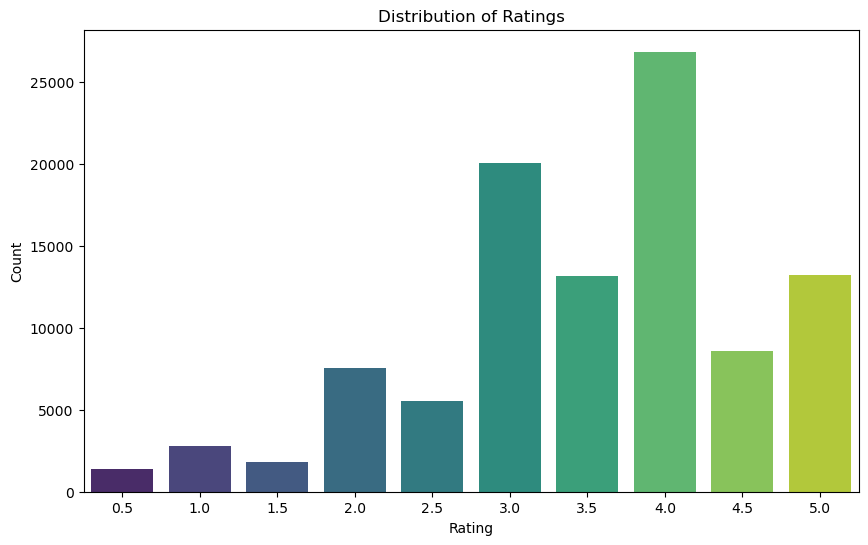

Rating Frequency:
0.5     1369
1.0     2810
1.5     1791
2.0     7550
2.5     5550
3.0    20044
3.5    13134
4.0    26815
4.5     8549
5.0    13206
Name: rating, dtype: int64

Analyzing Genres Frequency...


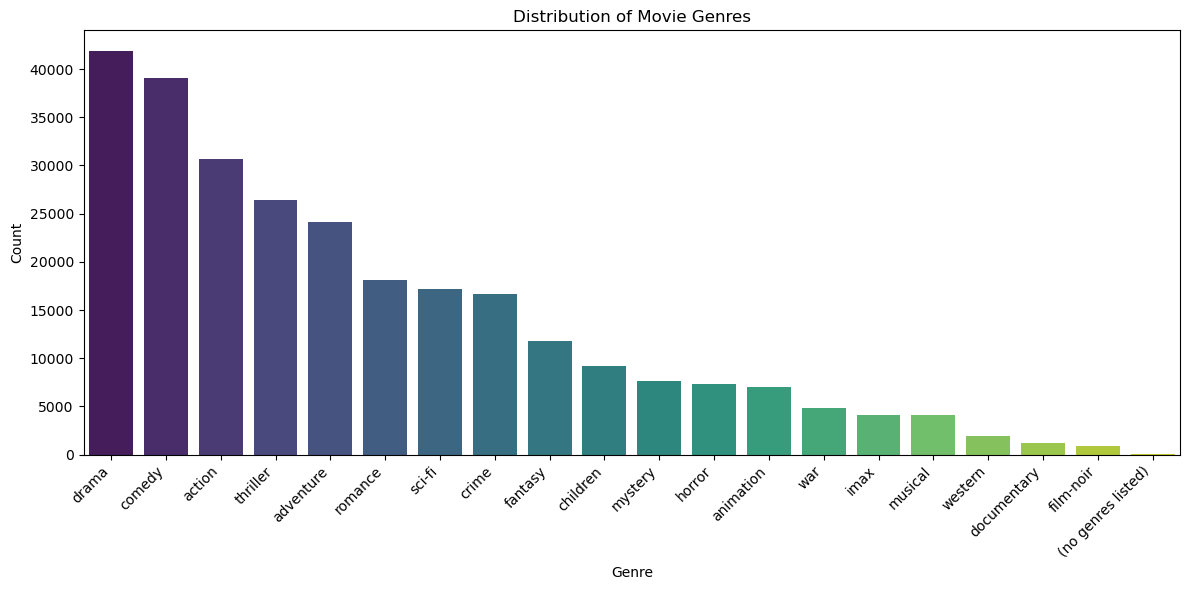

Top 10 Genres:
drama        41926
comedy       39053
action       30631
thriller     26447
adventure    24161
romance      18124
sci-fi       17237
crime        16681
fantasy      11834
children      9208
dtype: int64

Analyzing Year Frequency...


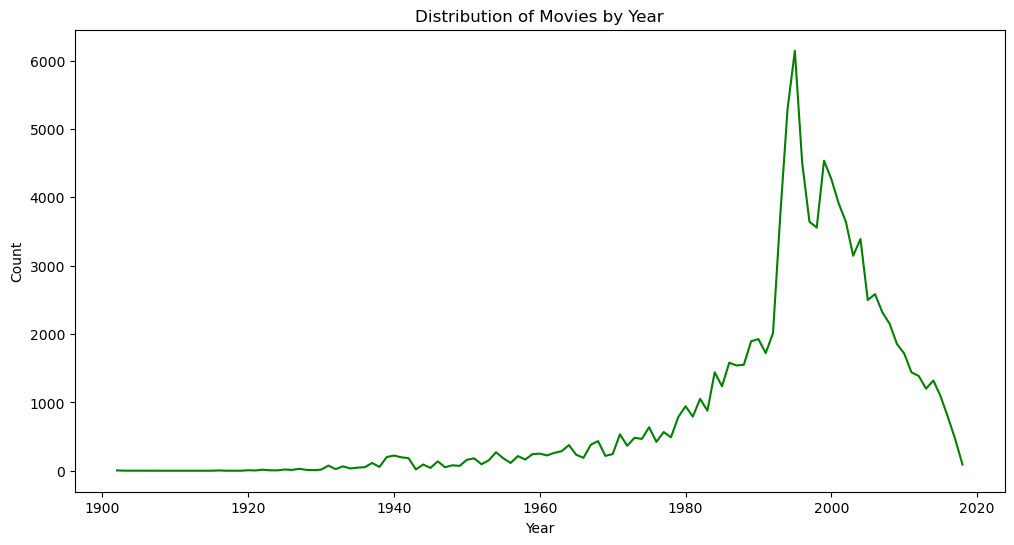

Movies per Decade:
1900        8
1910        8
1920      125
1930      687
1940     1101
1950     1784
1960     2858
1970     4995
1980    12912
1990    37087
2000    29766
2010     9487
Name: release_year, dtype: int64


In [35]:
class UnivariateAnalysis:
    """
    A class for performing univariate analysis on movie data.
    """
    def __init__(self, df):
        self.df = df
        
    def analyze_ratings_frequency(self):
        plt.figure(figsize=(10, 6))
        sns.countplot(x='rating', data=self.df, palette='viridis')
        plt.title('Distribution of Ratings')
        plt.xlabel('Rating')
        plt.ylabel('Count')
        plt.show()
        
        rating_counts = self.df['rating'].value_counts().sort_index()
        print("Rating Frequency:")
        print(rating_counts)
        
    def analyze_genres_frequency(self):
        genres = self.df['genres'].str.split(', ', expand=True).stack()
        # Count unique genres
        genre_counts = genres.value_counts()
        
        plt.figure(figsize=(12, 6))
        sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='viridis')
        plt.title('Distribution of Movie Genres')
        plt.xlabel('Genre')
        plt.ylabel('Count')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()
        
        print("Top 10 Genres:")
        print(genre_counts.head(10))
        
    def analyze_year_frequency(self):
        year_counts = self.df['release_year'].value_counts().sort_index()
        
        plt.figure(figsize=(12, 6))
        sns.lineplot(x=year_counts.index, y=year_counts.values, color='green')
        plt.title('Distribution of Movies by Year')
        plt.xlabel('Year')
        plt.ylabel('Count')
        plt.show()
        
        print("Movies per Decade:")
        decade_counts = self.df['release_year'].apply(lambda x: x - x % 10).value_counts().sort_index()
        print(decade_counts)
        
    def run_all_analyses(self):
        print('Analyzing Ratings Frequency...')
        self.analyze_ratings_frequency()
        print('\nAnalyzing Genres Frequency...')
        self.analyze_genres_frequency()
        print('\nAnalyzing Year Frequency...')
        self.analyze_year_frequency()

# Instantiate
univariate = UnivariateAnalysis(df)
univariate.run_all_analyses()

From the `distribution of ratings` plot we can see that the most common rating is 4.0 with about 25,000 movies and the distribution is positively skewed favouring higher ratings. Significant counts can also be seen at 3.0 and 3.5 while ratings of 2.0, 4.5 and 5.0 are notable but less frequent. Extremely low ratings of 0.5 and 1.0 are less common, suggesting that most movies are rated at least moderately well.

From the `distribution of genres` plot we can see that the most prevalent genre is Drama featuring slightly more than 40,000 movies closely followed by Comedy, which has just under 40,000 films. Action and Thriller genres also have substantial representations with Action being more popular than Thriller.
Moderately popular genres include Adventure and Romance each boasting over 20,000 movies while Sci-Fi and Crime have slightly fewer titles than these two.
Less common genres include Fantasy, Children’s, Mystery and Horror with moderate counts but significantly fewer than the top genres. Animation, War, IMAX, Musical and Western genres have even lower counts each with fewer than 10,000 movies indicating that they may cater to more niche audiences.
Documentary and Film-Noir are among the least common genres with each having fewer than 5,000 movies. There also appears to be a category for movies without any listed genres with a very low count.

The `distribution of movies by year` plot illustrates the historical trends in movie production highlighting periods of growth, peak and decline. We can see that the movie industry experienced significant growth starting in the late 1960s with a sharp increase in production through the 1990s and early 2000s.
The peak period is around the late 1990s with a maximum output of over 6,000 movies in the peak years.
This is then followed by a steep decline in movie production suggesting changes in the industry such as shifts in movie consumption, technological changes or economic factors affecting production.

In [34]:
class BivariateAnalysis:
    def __init__(self, df):
        self.df = df

    def analyze_release_year_vs_rating(self):
        plt.figure(figsize=(12, 6))
        sns.boxplot(x='release_year', y='rating', data=self.df, palette='muted')
        plt.title('Release Year vs. Rating')
        plt.xlabel('Release Year')
        plt.ylabel('Rating')
        plt.show()

    def analyze_genre_vs_rating(self):
        plt.figure(figsize=(12, 6))
        sns.boxplot(x=genre_counts.index, y='rating', data=self.df, palette='muted')
        plt.title('Genre vs. Rating')
        plt.xlabel('Genre')
        plt.ylabel('Rating')
        plt.show()

    def analyze_runtime_vs_revenue(self):
        movie_counts = df.groupby('title').size().reset_index(name='count')
        top_twenty_movies = df.sort_values(by='count', ascending=False).head(20)

        plt.figure(figsize=(12, 6))
        sns.scatterplot(x='title', y='rating', data=self.df, palette='muted')
        plt.title('Runtime vs. Revenue')
        plt.xlabel('Runtime')
        plt.ylabel('Revenue')
        plt.show()

bivariate = BivariateAnalysis(df)
bivariate

Analyzing Release Year vs Rating...


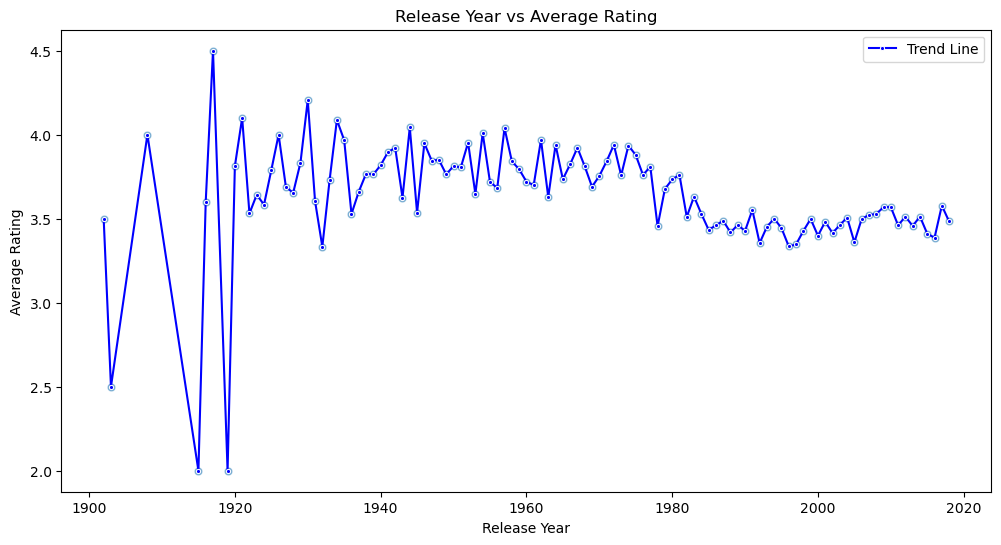


Analyzing Genres vs Rating...


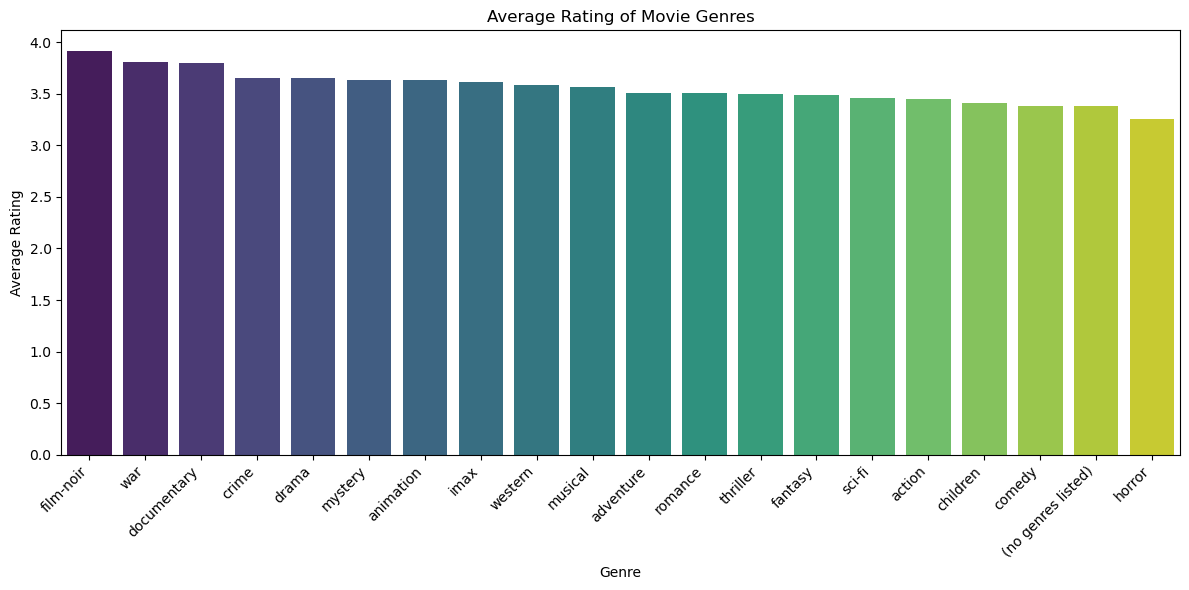


Analyzing Top Movies Distribution...


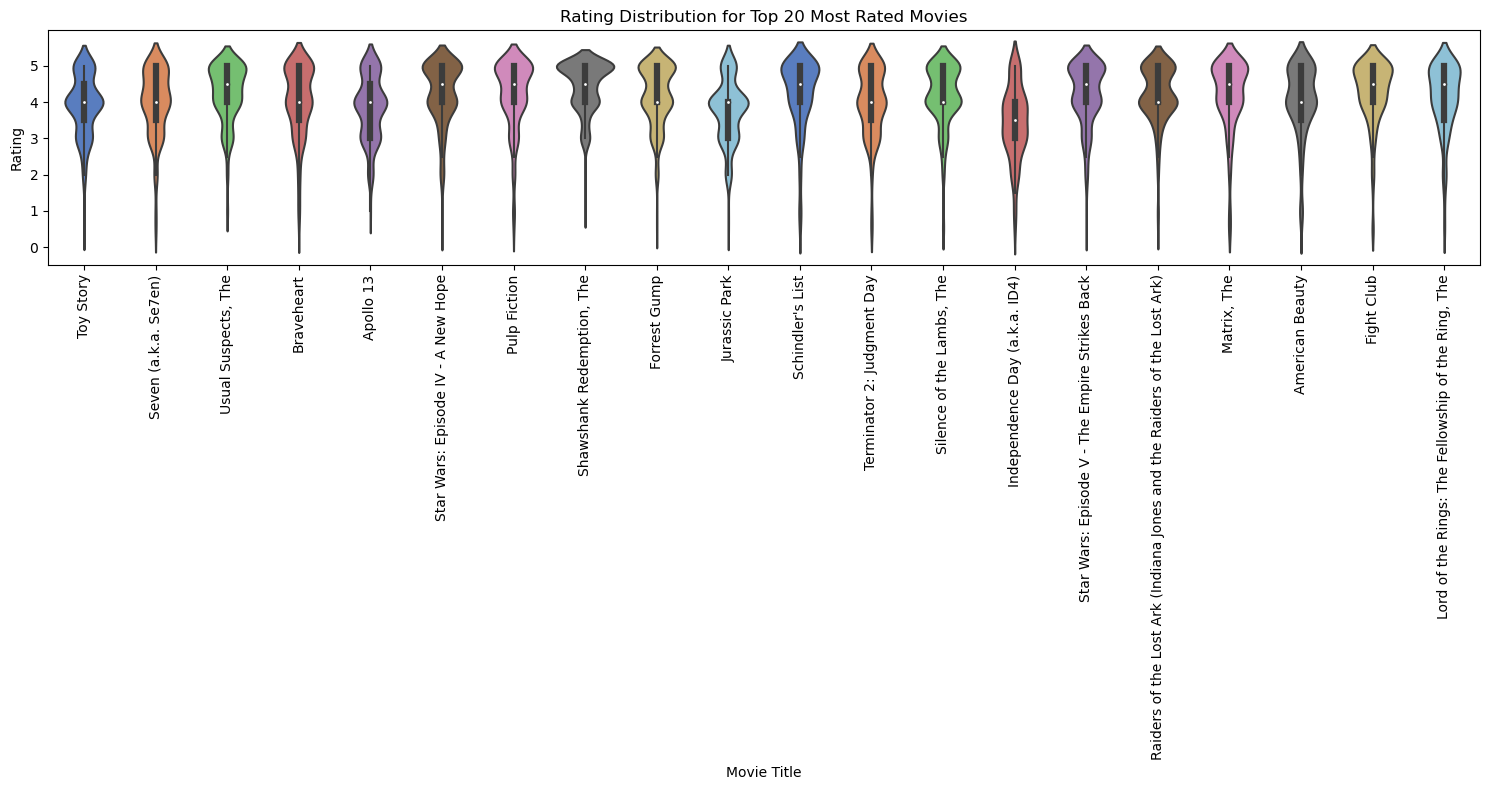

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

class MultivariateAnalysis:
    """
    A class for performing multivariate analysis on movie data.
    """

    def __init__(self, df):
        """
        Initialize the MultivariateAnalysis class with a DataFrame.

        Args:
            df (pandas.DataFrame): The DataFrame containing movie data.
        """
        self.df = df

    def analyze_year_vs_rating(self):
        """
        Analyze the relationship between release year, rating, and genre.

        This method creates a scatter plot showing the distribution of ratings
        across release years, segmented by genre.
        """
        # Group by release year and calculate the average rating
        average_ratings_by_year = self.df.groupby('release_year')['rating'].mean().reset_index()
    
        # Scatter plot of release year vs average rating
        plt.figure(figsize=(12, 6))
        sns.scatterplot(x='release_year', y='rating', data=average_ratings_by_year, alpha=0.6)
        # Add a line plot to show the trend
        sns.lineplot(x='release_year', y='rating', data=average_ratings_by_year, color='blue', marker='.', label='Trend Line')
        plt.title('Release Year vs Average Rating')
        plt.xlabel('Release Year')
        plt.ylabel('Average Rating')
        plt.legend()
        plt.show()

    def analyze_genre_vs_rating(self):
        """
        Analyze the relationship between genre, rating, and decade.

        This method creates a heatmap showing the average rating for each genre
        across different decades.
        """
        
        # Split genres into multiple rows
        genres = self.df['genres'].str.split(', ', expand=True).stack()
        genres.index = genres.index.droplevel(-1)
        genres.name = 'genre'
        
        # Create a new DataFrame with genres and ratings
        genre_ratings = self.df[['rating']].join(genres)
        
        # Calculate the mean rating for each genre
        genre_mean_ratings = genre_ratings.groupby('genre')['rating'].mean().sort_values(ascending=False)
        
        # Plot the mean rating for each genre
        plt.figure(figsize=(12, 6))
        sns.barplot(x=genre_mean_ratings.index, y=genre_mean_ratings.values, palette='viridis')
        plt.title('Average Rating of Movie Genres')
        plt.xlabel('Genre')
        plt.ylabel('Average Rating')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()


    def analyze_top_movies_rating_distribution(self):
        """
        Analyze the rating distribution of top 20 most rated movies.

        This method creates a violin plot showing the distribution of ratings
        for the top 20 movies with the most ratings.
        """
        movie_counts = self.df['title'].value_counts().reset_index()
        movie_counts.columns = ['title', 'count']
        top_twenty_movies = movie_counts.head(20)
        
        top_twenty_data = self.df[self.df['title'].isin(top_twenty_movies['title'])]
        
        plt.figure(figsize=(15, 8))
        sns.violinplot(x='title', y='rating', data=top_twenty_data, palette='muted')
        plt.title('Rating Distribution for Top 20 Most Rated Movies')
        plt.xlabel('Movie Title')
        plt.ylabel('Rating')
        plt.xticks(rotation=90)
        plt.tight_layout()
        plt.show()

        
    def run_multivariate (self):
        print('Analyzing Release Year vs Rating...')
        self.analyze_year_vs_rating()
        print('\nAnalyzing Genres vs Rating...')
        self.analyze_genre_vs_rating()
        print('\nAnalyzing Top Movies Distribution...')
        self.analyze_top_movies_rating_distribution()

multivariate = MultivariateAnalysis(df)
multivariate.run_multivariate()